In [89]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2d8940f0-1798-4576-bfd4-86a0cd2562c1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#used this to get the data rate limit to work jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

{'status': {'timestamp': '2024-04-10T01:05:13.832Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9550}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10974, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [90]:
type(data)

dict

In [91]:
import pandas as pd
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [92]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-04-10T01:05:13.832Z,0,None,24,1,None,9550


In [93]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19678181.00000,19678181.00000,False,NaN,1,NaN,NaN,None,2024-04-10T01:04:00.000Z,69008.04269,36195600733.47987,-3.22760,-0.12458,-3.39252,5.71765,1.44940,46.44812,47.94394,1357952754437.72534,52.42700,1449168896413.35010,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:22.131069
1,1027,Ethereum,ETH,ethereum,8757,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120070465.08056,120070465.08056,True,NaN,2,NaN,NaN,None,2024-04-10T01:03:00.000Z,3496.26780,18001133193.70520,-6.14300,-0.11599,-5.40884,6.91036,-8.31864,40.61198,34.30407,419798501349.42566,16.20520,419798501349.42999,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:22.131069
2,825,Tether USDt,USDT,tether,82037,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107051666082.89914,110942615136.67039,True,NaN,3,NaN,NaN,None,2024-04-10T01:03:00.000Z,1.00000,69797814683.14803,-0.56630,0.01662,-0.00493,-0.02508,-0.05729,-0.06351,-0.02416,107051640376.75282,4.13240,110942588496.20000,None,2024-04-10T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-09 20:05:22.131069
3,1839,BNB,BNB,bnb,2139,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149533470.89996,149533470.89996,False,NaN,4,NaN,NaN,None,2024-04-10T01:03:00.000Z,580.77158,1955382115.32509,5.54350,0.10399,-0.74694,5.92757,12.48369,79.74838,90.67039,86844790088.66768,3.35240,86844790088.67000,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:22.131069
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,445685811.14616,573660515.51445,True,NaN,5,NaN,NaN,None,2024-04-10T01:03:00.000Z,172.19663,2693048611.80757,-1.07190,-0.02890,-4.32203,-4.78127,22.95142,59.94177,71.11786,76745594652.87373,2.96260,98782407451.59000,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:22.131069
5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,None,2024-04-10T01:04:00.000Z,0.61290,2423681774.84800,19.89180,0.00228,-0.55904,6.22462,2.75539,17.00464,2.40176,33741184802.70067,1.30250,61290163722.78000,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:22.131069
6,3408,USDC,USDC,usd-coin,18040,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32294081633.22264,32294081633.22264,False,NaN,7,NaN,NaN,None,2024-04-10T01:03:00.000Z,1.00037,7873480087.80369,-3.52920,0.00717,0.03148,0.03104,0.08041,0.02049,0.03179,32306171998.29552,1.24710,32306171998.30000,None,2024-04-10T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-09 20:05:22.131069
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143819966383.70526,143819966383.70526,True,NaN,8,NaN,NaN,None,2024-04-10T01:04:00.000Z,0.18900,2072740861.75118,-1.00420,0.22741,-5.79490,7.00202,15.19847,132.06785,126.60258,27182604025.75052,1.04950,27182604025.75000,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN

In [94]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2d8940f0-1798-4576-bfd4-86a0cd2562c1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/anabellap/Desktop/Creative:Professional Work/Python Scripts/API.csv'):
        df.to_csv(r'/Users/anabellap/Desktop/Creative:Professional Work/Python Scripts/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/anabellap/Desktop/Creative:Professional Work/Python Scripts/API.csv', mode = 'a', headers=False)
    
    #df_append = pd.DataFrame(df2)
    #df= pd.concat([df2, df_append])

#df2['timestamp'] = pd.to_datetime('now')
#df=df.append(df2)

In [95]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-04-10T01:05:29.160Z', 'error_code': 0, 'error_message': None, 'elapsed': 12, 'credit_count': 1, 'notice': None, 'total_count': 9550}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10974, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

TypeError: NDFrame.to_csv() got an unexpected keyword argument 'headers'

In [96]:
df72 = pd.read_csv(r'/Users/anabellap/Desktop/Creative:Professional Work/Python Scripts/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10974,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19678181.00000,19678181.00000,False,NaN,1,NaN,NaN,NaN,2024-04-09T23:32:00.000Z,68949.58392,36309119162.05153,-2.68960,-0.44530,-4.04031,5.13874,0.28413,46.23753,47.08583,1356802392175.79028,52.49470,1447941262238.18994,NaN,2024-04-09T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 19:04:34.210580
1,1,1027,Ethereum,ETH,ethereum,8757,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120070465.08056,120070465.08056,True,NaN,2,NaN,NaN,NaN,2024-04-09T23:31:00.000Z,3493.10384,18245201586.73844,-4.80000,-0.56187,-5.77873,6.14849,-9.56561,40.19665,35.74036,419418602960.44928,16.19910,419418602960.45001,NaN,2024-04-09T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 19:04:34.210580
2,2,825,Tether USDt,USDT,tether,82036,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,107051666082.89914,110942615136.67039,True,NaN,3,NaN,NaN,NaN,2024-04-09T23:31:00.000Z,0.99963,70184978016.79625,0.44310,-0.00054,-0.05073,-0.05850,-0.13087,-0.09621,-0.08783,107011544988.34071,4.13310,110901035782.37000,NaN,2024-04-09T23:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-09 19:04:34.210580
3,3,1839,BNB,BNB,bnb,2139,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149533470.89996,149533470.89996,False,NaN,4,NaN,NaN,NaN,2024-04-09T23:31:00.000Z,579.84103,1989166760.82678,14.52350,-0.44683,-1.58662,4.33058,10.20892,79.18756,89.79964,86705641422.14735,3.34880,86705641422.14999,NaN,2024-04-09T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 19:04:34.210580
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,445685811.14616,573660515.51445,True,NaN,5,NaN,NaN,NaN,2024-04-09T23:31:00.000Z,172.48556,2665882059.98753,-3.14090,-0.79751,-4.73390,-5.26352,19.89792,60.68816,67.58433,76874366455.65457,2.96910,98948154928.66000,NaN,2024-04-09T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 19:04:34.210580
5,5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,NaN,2024-04-09T23:32:00.000Z,0.61426,2411744614.91363,19.95820,-1.24635,-0.54060,4.64556,1.20997,16.90194,1.71370,33816050584.68241,1.30860,61426155865.96000,NaN,2024-04-09T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 19:04:34.210580
6,6,3408,USDC,USDC,usd-coin,18039,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32294081633.22264,32294081633.22264,False,NaN,7,NaN,NaN,NaN,2024-04-09T23:31:00.000Z,1.00008,7945999314.50683,-2.29500,0.00126,-0.00972,0.01074,0.01561,0.00993,0.00979,32296538795.58044,1.24740,32296538795.58000,NaN,2024-04-09T23:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-09 19:04:34.210580
7,7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143819966383.70526,143819966383.70526,True,NaN,8,NaN,NaN,NaN,2024-04-09T23:32:00.000Z,0.18738,2060426955.11616,-2.58750,-1.24065,-7.87367,1.83209,11.07993,129.94405,124.72259,26949264786.89051,1.04270,26949264786.89000,NaN,2024-04-09T23:32:00.

In [97]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19678181.00000,19678181.00000,False,NaN,1,NaN,NaN,None,2024-04-10T01:04:00.000Z,69008.04269,36195600733.47987,-3.22760,-0.12458,-3.39252,5.71765,1.44940,46.44812,47.94394,1357952754437.72534,52.42700,1449168896413.35010,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
1,1027,Ethereum,ETH,ethereum,8757,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120070465.08056,120070465.08056,True,NaN,2,NaN,NaN,None,2024-04-10T01:03:00.000Z,3496.26780,18001133193.70520,-6.14300,-0.11599,-5.40884,6.91036,-8.31864,40.61198,34.30407,419798501349.42566,16.20520,419798501349.42999,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
2,825,Tether USDt,USDT,tether,82037,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107051666082.89914,110942615136.67039,True,NaN,3,NaN,NaN,None,2024-04-10T01:03:00.000Z,1.00000,69797814683.14803,-0.56630,0.01662,-0.00493,-0.02508,-0.05729,-0.06351,-0.02416,107051640376.75282,4.13240,110942588496.20000,None,2024-04-10T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-09 20:05:29.127928
3,1839,BNB,BNB,bnb,2139,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149533470.89996,149533470.89996,False,NaN,4,NaN,NaN,None,2024-04-10T01:03:00.000Z,580.77158,1955382115.32509,5.54350,0.10399,-0.74694,5.92757,12.48369,79.74838,90.67039,86844790088.66768,3.35240,86844790088.67000,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,445685811.14616,573660515.51445,True,NaN,5,NaN,NaN,None,2024-04-10T01:03:00.000Z,172.19663,2693048611.80757,-1.07190,-0.02890,-4.32203,-4.78127,22.95142,59.94177,71.11786,76745594652.87373,2.96260,98782407451.59000,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,None,2024-04-10T01:04:00.000Z,0.61290,2423681774.84800,19.89180,0.00228,-0.55904,6.22462,2.75539,17.00464,2.40176,33741184802.70067,1.30250,61290163722.78000,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
6,3408,USDC,USDC,usd-coin,18040,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32294081633.22264,32294081633.22264,False,NaN,7,NaN,NaN,None,2024-04-10T01:03:00.000Z,1.00037,7873480087.80369,-3.52920,0.00717,0.03148,0.03104,0.08041,0.02049,0.03179,32306171998.29552,1.24710,32306171998.30000,None,2024-04-10T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-09 20:05:29.127928
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143819966383.70526,143819966383.70526,True,NaN,8,NaN,NaN,None,2024-04-10T01:04:00.000Z,0.18900,2072740861.75118,-1.00420,0.22741,-5.79490,7.00202,15.19847,132.06785,126.60258,27182604025.75052,1.04950,27182604025.75000,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN

In [98]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [99]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19678181.00000,19678181.00000,False,NaN,1,NaN,NaN,None,2024-04-10T01:04:00.000Z,69008.04269,36195600733.47987,-3.22760,-0.12458,-3.39252,5.71765,1.44940,46.44812,47.94394,1357952754437.72534,52.42700,1449168896413.35010,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
1,1027,Ethereum,ETH,ethereum,8757,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120070465.08056,120070465.08056,True,NaN,2,NaN,NaN,None,2024-04-10T01:03:00.000Z,3496.26780,18001133193.70520,-6.14300,-0.11599,-5.40884,6.91036,-8.31864,40.61198,34.30407,419798501349.42566,16.20520,419798501349.42999,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
2,825,Tether USDt,USDT,tether,82037,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107051666082.89914,110942615136.67039,True,NaN,3,NaN,NaN,None,2024-04-10T01:03:00.000Z,1.00000,69797814683.14803,-0.56630,0.01662,-0.00493,-0.02508,-0.05729,-0.06351,-0.02416,107051640376.75282,4.13240,110942588496.20000,None,2024-04-10T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-09 20:05:29.127928
3,1839,BNB,BNB,bnb,2139,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149533470.89996,149533470.89996,False,NaN,4,NaN,NaN,None,2024-04-10T01:03:00.000Z,580.77158,1955382115.32509,5.54350,0.10399,-0.74694,5.92757,12.48369,79.74838,90.67039,86844790088.66768,3.35240,86844790088.67000,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,445685811.14616,573660515.51445,True,NaN,5,NaN,NaN,None,2024-04-10T01:03:00.000Z,172.19663,2693048611.80757,-1.07190,-0.02890,-4.32203,-4.78127,22.95142,59.94177,71.11786,76745594652.87373,2.96260,98782407451.59000,None,2024-04-10T01:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
5,52,XRP,XRP,xrp,1293,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,6,NaN,NaN,None,2024-04-10T01:04:00.000Z,0.61290,2423681774.84800,19.89180,0.00228,-0.55904,6.22462,2.75539,17.00464,2.40176,33741184802.70067,1.30250,61290163722.78000,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 20:05:29.127928
6,3408,USDC,USDC,usd-coin,18040,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32294081633.22264,32294081633.22264,False,NaN,7,NaN,NaN,None,2024-04-10T01:03:00.000Z,1.00037,7873480087.80369,-3.52920,0.00717,0.03148,0.03104,0.08041,0.02049,0.03179,32306171998.29552,1.24710,32306171998.30000,None,2024-04-10T01:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-09 20:05:29.127928
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143819966383.70526,143819966383.70526,True,NaN,8,NaN,NaN,None,2024-04-10T01:04:00.000Z,0.18900,2072740861.75118,-1.00420,0.22741,-5.79490,7.00202,15.19847,132.06785,126.60258,27182604025.75052,1.04950,27182604025.75000,None,2024-04-10T01:04:00.000Z,NaN,NaN,NaN

In [100]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12458,-3.39252,5.71765,1.44940,46.44812,47.94394
Ethereum,-0.11599,-5.40884,6.91036,-8.31864,40.61198,34.30407
Tether USDt,0.01662,-0.00493,-0.02508,-0.05729,-0.06351,-0.02416
BNB,0.10399,-0.74694,5.92757,12.48369,79.74838,90.67039
Solana,-0.02890,-4.32203,-4.78127,22.95142,59.94177,71.11786
XRP,0.00228,-0.55904,6.22462,2.75539,17.00464,2.40176
USDC,0.00717,0.03148,0.03104,0.08041,0.02049,0.03179
Dogecoin,0.22741,-5.79490,7.00202,15.19847,132.06785,126.60258
Toncoin,0.96144,6.44106,39.38070,146.38693,224.32259,197.64093


In [101]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.12458
              quote.USD.percent_change_24h    -3.39252
              quote.USD.percent_change_7d      5.71765
              quote.USD.percent_change_30d     1.44940
              quote.USD.percent_change_60d    46.44812
              quote.USD.percent_change_90d    47.94394
Ethereum      quote.USD.percent_change_1h     -0.11599
              quote.USD.percent_change_24h    -5.40884
              quote.USD.percent_change_7d      6.91036
              quote.USD.percent_change_30d    -8.31864
              quote.USD.percent_change_60d    40.61198
              quote.USD.percent_change_90d    34.30407
Tether USDt   quote.USD.percent_change_1h      0.01662
              quote.USD.percent_change_24h    -0.00493
              quote.USD.percent_change_7d     -0.02508
              quote.USD.percent_change_30d    -0.05729
              quote.USD.percent_change_60d    -0.06351
              quote.US

In [102]:
type(df3)

pandas.core.frame.DataFrame

In [103]:
type(df4)

pandas.core.series.Series

In [104]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.12458
             quote.USD.percent_change_24h  -3.39252
             quote.USD.percent_change_7d    5.71765
             quote.USD.percent_change_30d   1.44940
             quote.USD.percent_change_60d  46.44812
             quote.USD.percent_change_90d  47.94394
Ethereum     quote.USD.percent_change_1h   -0.11599
             quote.USD.percent_change_24h  -5.40884
             quote.USD.percent_change_7d    6.91036
             quote.USD.percent_change_30d  -8.31864
             quote.USD.percent_change_60d  40.61198
             quote.USD.percent_change_90d  34.30407
Tether USDt  quote.USD.percent_change_1h    0.01662
             quote.USD.percent_change_24h  -0.00493
             quote.USD.percent_change_7d   -0.02508
             quote.USD.percent_change_30d  -0.05729
             quote.USD.percent_change_60d  -0.06351
             quote.USD.percent_change_90d  -0.02416
BNB          quote.USD.percent_change_1h    0.10399
             quote.USD.percent_change_24h  -0.74694
             quote.USD.percent_change_7d    5.92757
             quote.USD.percent_change_30d  12.48369
             quote.USD.percent_change_60d  79.74838
             quote.USD.percent_change_90d  90.67039
Solana       quote.USD.percent_change_1h   -0.02890
             quote.USD.percent_change_24h  -4.32203
             quote.USD.percent_change_7d   -4.78127
             quote.USD.percent_change_30d  22.95142
             quote.USD.percent_change_60d  59.94177
             quote.USD.percent_change_90d  71.11786
XRP          quote.USD.percent_change_1h    0.00228
             quote.USD.percent_change_24h  -0.55904
             quote.USD.percent_change_7d    6.22462
             quote.USD.percent_change_30d   2.75539
             quote.USD.percent_change_60d  17.00464
             quote.USD.percent_change_90d   2.40176
USDC         quote.USD.percent_change_1h    0.00717
             quote.USD.percent_change_24h   0.03148
             quote.USD.percent_change_7d    0.03104
             quote.USD.percent_change_30d   0.08041
             quote.USD.percent_change_60d   0.02049
             quote.USD.percent_change_90d   0.03179
Dogecoin     quote.USD.percent_change_1h    0.22741
             quote.USD.percent_change_24h  -5.79490
             quote.USD.percent_change_7d    7.00202
             quote.USD.percent_change_30d  15.19847
             quote.USD.percent_change_60d 132.06785
             quote.USD.percent_change_90d 126.60258
Toncoin      quote.USD.percent_change_1h    0.96144
             quote.USD.percent_change_24h   6.44106
             quote.USD.percent_change_7d   39.38070
             quote.USD.percent_change_30d 146.38693
             quote.USD.percent_change_60d 224.32259
             quote.USD.percent_change_90d 197.64093
Cardano      quote.USD.percent_change_1h   -0.04343
             quote.USD.percent_change_24h  -3.41925
             quote.USD.percent_change_7d    2.83852
             quote.USD.percent_change_30d -15.72948
             quote.USD.percent_change_60d   8.25141
             quote.USD.percent_change_90d   3.22899
Avalanche    quote.USD.percent_change_1h    0.59560
             quote.USD.percent_change_24h  -5.95670
             quote.USD.percent_change_7d    0.61690
             quote.USD.percent_change_30d  13.95173
             quote.USD.percent_change_60d  20.88936
             quote.USD.percent_change_90d  21.22631
Shiba Inu    quote.USD.percent_change_1h    0.27964
             quote.USD.percent_change_24h  -3.80619
             quote.USD.percent_change_7d    5.35235
             quote.USD.percent_change_30d -12.20985
             quote.USD.percent_change_60d 192.16492
             quote.USD.percent_change_90d 174.98905
Bitcoin Cash quote.USD.percent_change_1h   -0.58287
             quote.USD.percent_change_24h  -1.87202
             quote.USD.percent_change_7d    5.84870
             quote.USD.percent_change_30d

In [105]:
type(df5)

pandas.core.frame.DataFrame

In [106]:
df5.count()

values    90
dtype: int64

In [107]:
index = pd.Index(range(90))


df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12458
1,Bitcoin,quote.USD.percent_change_24h,-3.39252
2,Bitcoin,quote.USD.percent_change_7d,5.71765
3,Bitcoin,quote.USD.percent_change_30d,1.44940
4,Bitcoin,quote.USD.percent_change_60d,46.44812
5,Bitcoin,quote.USD.percent_change_90d,47.94394
6,Ethereum,quote.USD.percent_change_1h,-0.11599
7,Ethereum,quote.USD.percent_change_24h,-5.40884
8,Ethereum,quote.USD.percent_change_7d,6.91036
9,Ethereum,quote.USD.percent_change_30d,-8.31864


In [67]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.44530
1,Bitcoin,quote.USD.percent_change_24h,-4.04031
2,Bitcoin,quote.USD.percent_change_7d,5.13874
3,Bitcoin,quote.USD.percent_change_30d,0.28413
4,Bitcoin,quote.USD.percent_change_60d,46.23753
5,Bitcoin,quote.USD.percent_change_90d,47.08583
6,Ethereum,quote.USD.percent_change_1h,-0.56187
7,Ethereum,quote.USD.percent_change_24h,-5.77873
8,Ethereum,quote.USD.percent_change_7d,6.14849
9,Ethereum,quote.USD.percent_change_30d,-9.56561


In [108]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.44530
1,Bitcoin,24h,-4.04031
2,Bitcoin,7d,5.13874
3,Bitcoin,30d,0.28413
4,Bitcoin,60d,46.23753
5,Bitcoin,90d,47.08583
6,Ethereum,1h,-0.56187
7,Ethereum,24h,-5.77873
8,Ethereum,7d,6.14849
9,Ethereum,30d,-9.56561


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

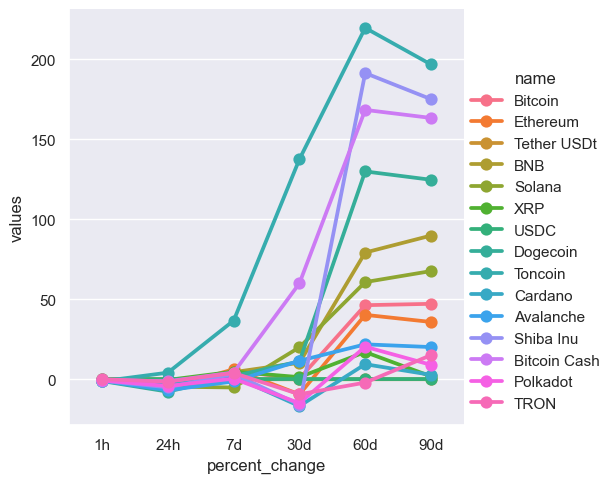

In [109]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [110]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69008.04269,2024-04-09 20:05:29.127928


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

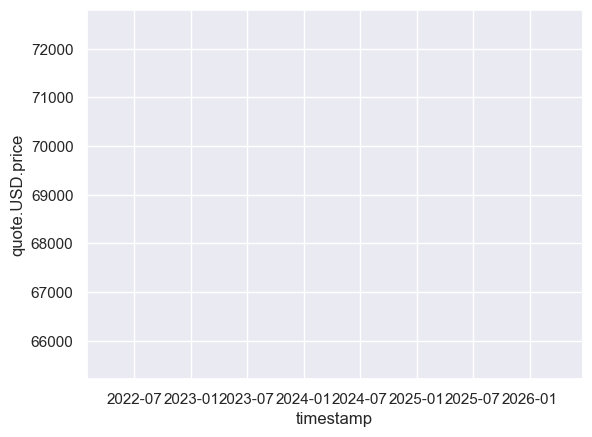

In [111]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data= df10)